In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.image as mpimg

In [109]:
train_path='./dataset/training_set/'
test_path='./dataset/test_set/'

In [110]:
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.preprocessing import image_dataset_from_directory

In [175]:
#load images and data augmentation
train_ds=idg(rescale=1./255,horizontal_flip=True,rotation_range=30,zoom_range=0.2,validation_split=0.2)
batch_size=32
image_size=(64,64)
#train_ds=image_dataset_from_directory(train_path,labels="inferred",label_mode='categorical',batch_size=batch_size,image_size=image_size,color_mode="rgb",validation_split=0.1,subset='training',seed=1337)
train_it=train_ds.flow_from_directory(train_path,class_mode='categorical',batch_size=batch_size,target_size=image_size,subset='training')
val_it=train_ds.flow_from_directory(train_path,class_mode='categorical',batch_size=batch_size,target_size=image_size,subset='validation')
#val_ds=image_dataset_from_directory(train_path,labels="inferred",label_mode='categorical',batch_size=batch_size,image_size=image_size,color_mode="rgb",validation_split=0.1,subset='validation',seed=1337)

#test iterator
test_ds=image_dataset_from_directory(test_path,labels="inferred",label_mode='categorical',image_size=image_size)


Found 6484 images belonging to 2 classes.
Found 1621 images belonging to 2 classes.
Found 2043 files belonging to 2 classes.


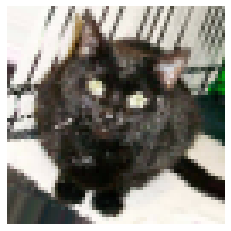

In [176]:
i=0
for arr in train_it:
    images=arr[0][0]
    plt.imshow(images)
    plt.axis("off")
    i+=1
    if(i>10):
        break

In [177]:
#model=keras.models.load_model('models/model2')

In [178]:
dictionary={1:'Dog',0:'Cat'}

In [179]:
#for test data
# import random
# for images,labels in test_ds.take(1):
#     i=random.randint(0,32)
#     img=images[i].numpy().astype("uint8")
#     plt.imshow(img)
#     actual_label=dictionary[np.argmax(labels[i])]
#     plt.title("Actual Label: "+actual_label)
#     plt.axis("off")
#     score=np.argmax(model.predict(img.reshape(1,64,64,3)))
#     print("Model Says: "+dictionary[score])

In [180]:
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout,BatchNormalization,Conv2D,Flatten,MaxPool2D,Dense

In [181]:
model=Sequential([
    Conv2D(32,kernel_size=(2,2),input_shape=(64,64,3),padding="same",activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=1, padding="same"),
    BatchNormalization(),
    Conv2D(64,kernel_size=(3,3),activation='relu',padding="same"),
    MaxPool2D(pool_size=(2, 2), strides=1, padding="same"),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(16,kernel_size=(2,2),activation='relu',padding="valid"),
    MaxPool2D(pool_size=(2, 2), strides=2, padding="valid"),
    BatchNormalization(),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')]
)

In [182]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_50 (Dropout)         (None, 64, 64, 64)      

In [183]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [184]:
model.fit(train_it,validation_data=val_it,epochs=50,verbose=1)

Epoch 1/50
203/203 [==============================] - 342s 2s/step - loss: 0.7947 - accuracy: 0.5700 - val_loss: 1.2081 - val_accuracy: 0.5065
Epoch 2/50
203/203 [==============================] - 367s 2s/step - loss: 0.6186 - accuracy: 0.6583 - val_loss: 0.6741 - val_accuracy: 0.5910
Epoch 3/50
203/203 [==============================] - 376s 2s/step - loss: 0.5708 - accuracy: 0.7041 - val_loss: 0.5843 - val_accuracy: 0.6854
Epoch 4/50
203/203 [==============================] - 377s 2s/step - loss: 0.5424 - accuracy: 0.7196 - val_loss: 0.5812 - val_accuracy: 0.6885
Epoch 5/50
203/203 [==============================] - 382s 2s/step - loss: 0.5222 - accuracy: 0.7401 - val_loss: 0.5520 - val_accuracy: 0.7187
Epoch 6/50
203/203 [==============================] - 382s 2s/step - loss: 0.5048 - accuracy: 0.7456 - val_loss: 0.5267 - val_accuracy: 0.7458
Epoch 7/50
203/203 [==============================] - 379s 2s/step - loss: 0.4992 - accuracy: 0.7463 - val_loss: 0.5219 - val_accuracy: 0.7397

In [185]:
model.save('models/model3')

INFO:tensorflow:Assets written to: models/model3\assets


Model Says: Dog


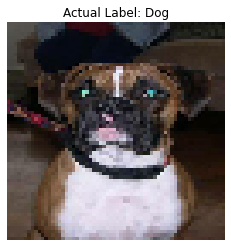

In [190]:
#for test data
import random
for images,labels in test_ds.take(1):
    i=random.randint(0,32)
    img=images[i].numpy().astype("uint8")
    plt.imshow(img)
    actual_label=dictionary[np.argmax(labels[i])]
    plt.title("Actual Label: "+actual_label)
    plt.axis("off")
    score=np.argmax(model.predict(img.reshape(1,64,64,3)))
    print("Model Says: "+dictionary[score])